# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

In [188]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.11.4
numpy version:  1.24.4
pandas version:  2.0.3
statsmodels version:  0.14.0


You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [189]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Import packages for data modeling
### YOUR CODE HERE ###
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [190]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


<span style="color:red">**Observations:**</span> both independent and dependent variables must be in float type. The dependent variable must be finite and categorical. The data can't have null values.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [191]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [192]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [193]:
# Get data types of columns
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get basic information about the dataset.

In [194]:
# Get basic information
### YOUR CODE HERE ###
mask = data.isna().any(axis=1)
data[mask]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,NaN,4380513697,39,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,NaN,8352130892,60,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,NaN,4443076562,25,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,NaN,8328300333,7,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,NaN,3968729520,8,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


Generate basic descriptive statistics about the dataset.

In [195]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Check for and handle missing values.

In [196]:
# Check for missing values
### YOUR CODE HERE ###
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [197]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna()

In [198]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


Check for and handle duplicates.

In [199]:
# Check for duplicates
### YOUR CODE HERE ###
data[data.duplicated()]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


Check for and handle outliers.

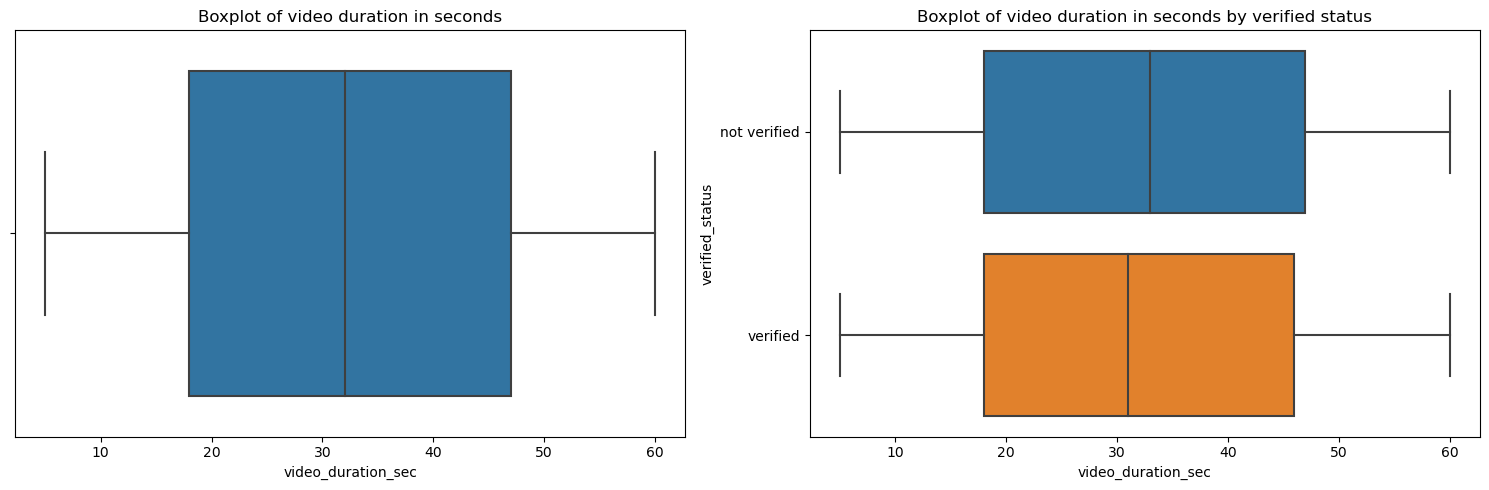

In [200]:
fig, (axes0, axes1) = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=data, x='video_duration_sec', showfliers=True, ax=axes0)
axes0.set_title('Boxplot of video duration in seconds')

sns.boxplot(data=data, x='video_duration_sec', y='verified_status', showfliers=True, ax=axes1)
axes1.set_title('Boxplot of video duration in seconds by verified status')

plt.tight_layout()
plt.show();

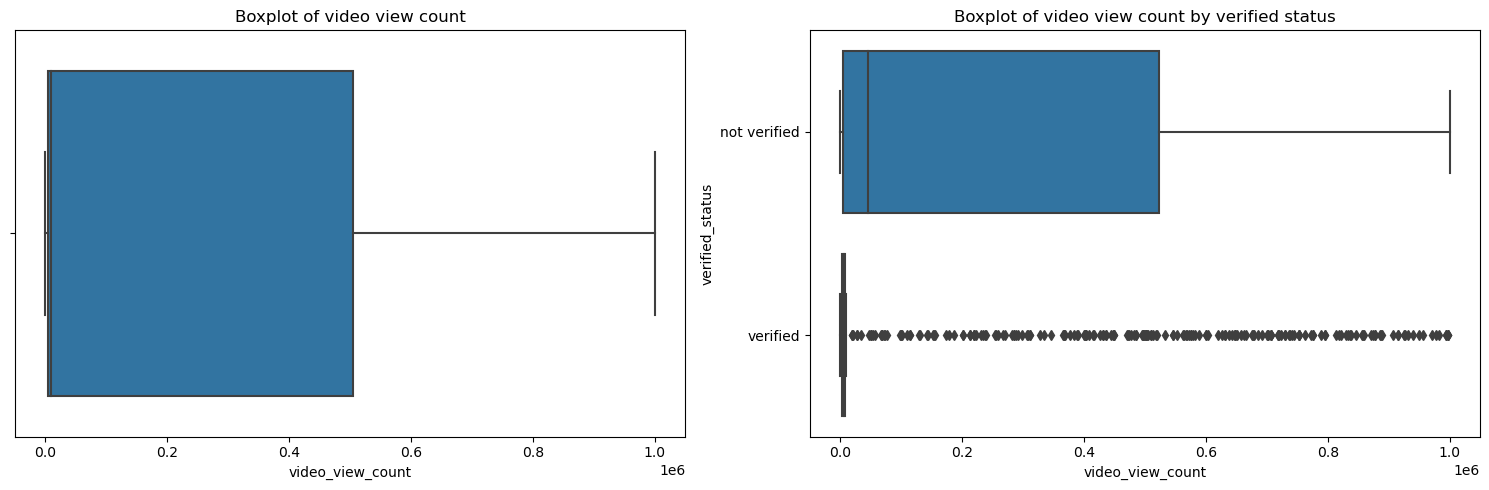

In [201]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
fig, (axes0, axes1) = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=data, x='video_view_count', showfliers=True, ax=axes0)
axes0.set_title('Boxplot of video view count')

sns.boxplot(data=data, x='video_view_count', y='verified_status', showfliers=True, ax=axes1)
axes1.set_title('Boxplot of video view count by verified status')

plt.tight_layout()
plt.show();

q25 = data['video_view_count'].quantile(0.25)
q75 = data['video_view_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = iqr * 1.5 + q75

data.loc[data['video_view_count'] > upper_limit, 'video_view_count'] = upper_limit

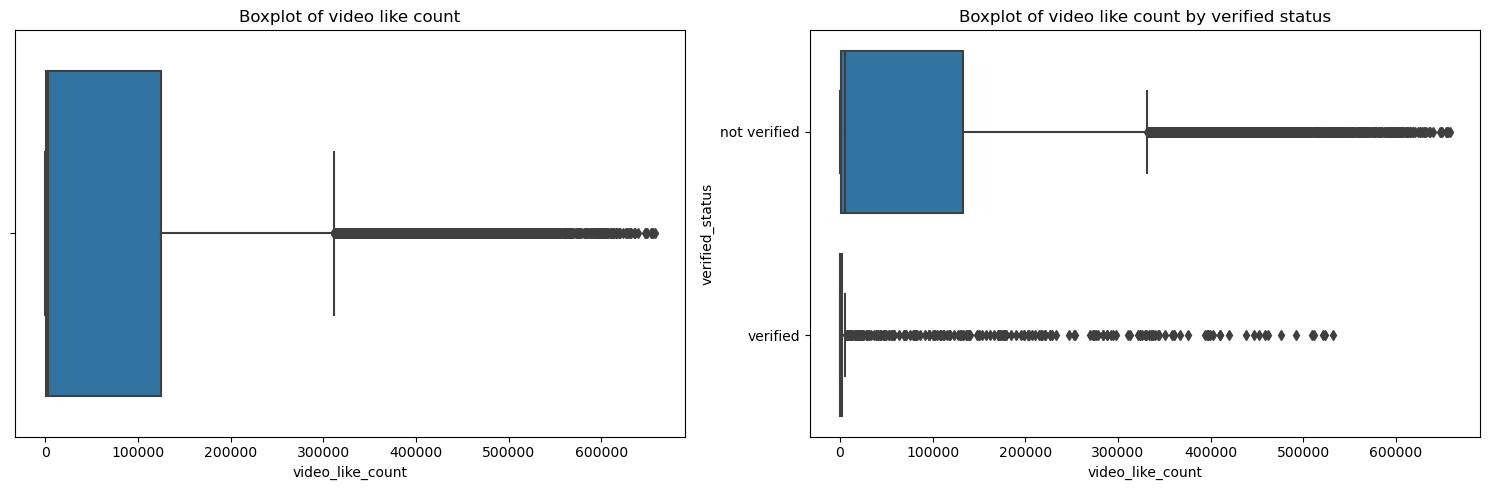

In [202]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
fig, (axes0, axes1) = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=data, x='video_like_count', showfliers=True, ax=axes0)
axes0.set_title('Boxplot of video like count')

sns.boxplot(data=data, x='video_like_count', y='verified_status', showfliers=True, ax=axes1)
axes1.set_title('Boxplot of video like count by verified status')

plt.tight_layout()
plt.show();

In [276]:
q25 = data['video_like_count'].quantile(0.25)
q75 = data['video_like_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = iqr * 1.5 + q75

data.loc[data['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

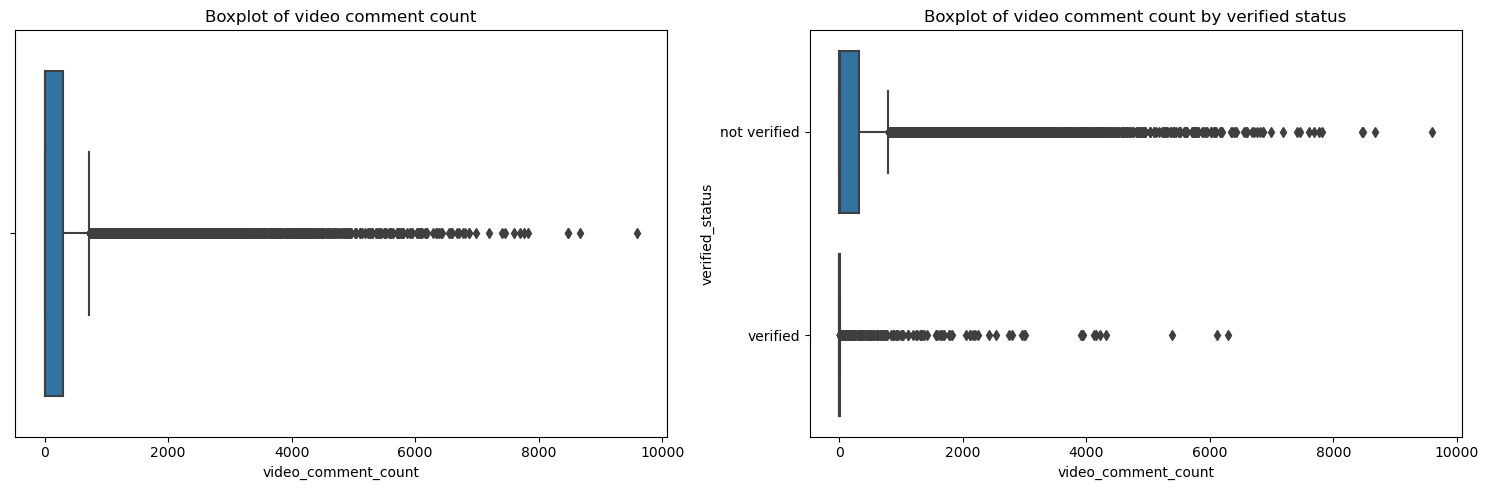

In [203]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
fig, (axes0, axes1) = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=data, x='video_comment_count', showfliers=True, ax=axes0)
axes0.set_title('Boxplot of video comment count')

sns.boxplot(data=data, x='video_comment_count', y='verified_status', showfliers=True, ax=axes1)
axes1.set_title('Boxplot of video comment count by verified status')

plt.tight_layout()
plt.show();

q25 = data['video_comment_count'].quantile(0.25)
q75 = data['video_comment_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = iqr * 1.5 + q75

data.loc[data['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit

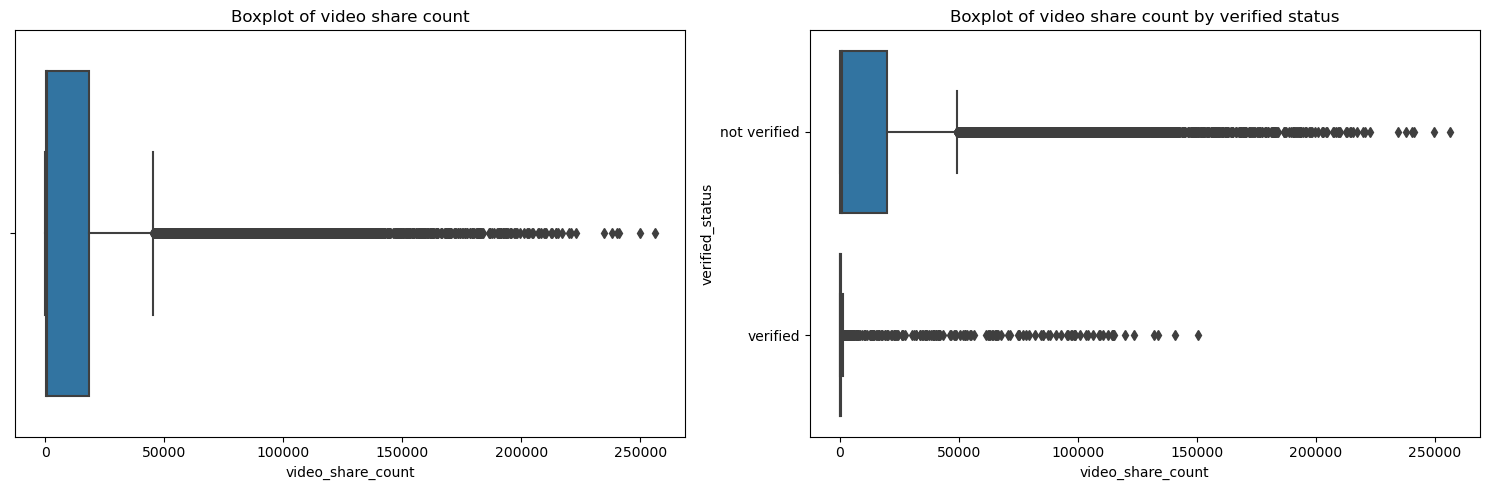

In [204]:
# Check for and handle outliers for video_share_count
### YOUR CODE HERE ###
fig, (axes0, axes1) = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=data, x='video_share_count', showfliers=True, ax=axes0)
axes0.set_title('Boxplot of video share count')

sns.boxplot(data=data, x='video_share_count', y='verified_status', showfliers=True, ax=axes1)
axes1.set_title('Boxplot of video share count by verified status')

plt.tight_layout()
plt.show();

q25 = data['video_share_count'].quantile(0.25)
q75 = data['video_share_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = iqr * 1.5 + q75

data.loc[data['video_share_count'] > upper_limit, 'video_share_count'] = upper_limit

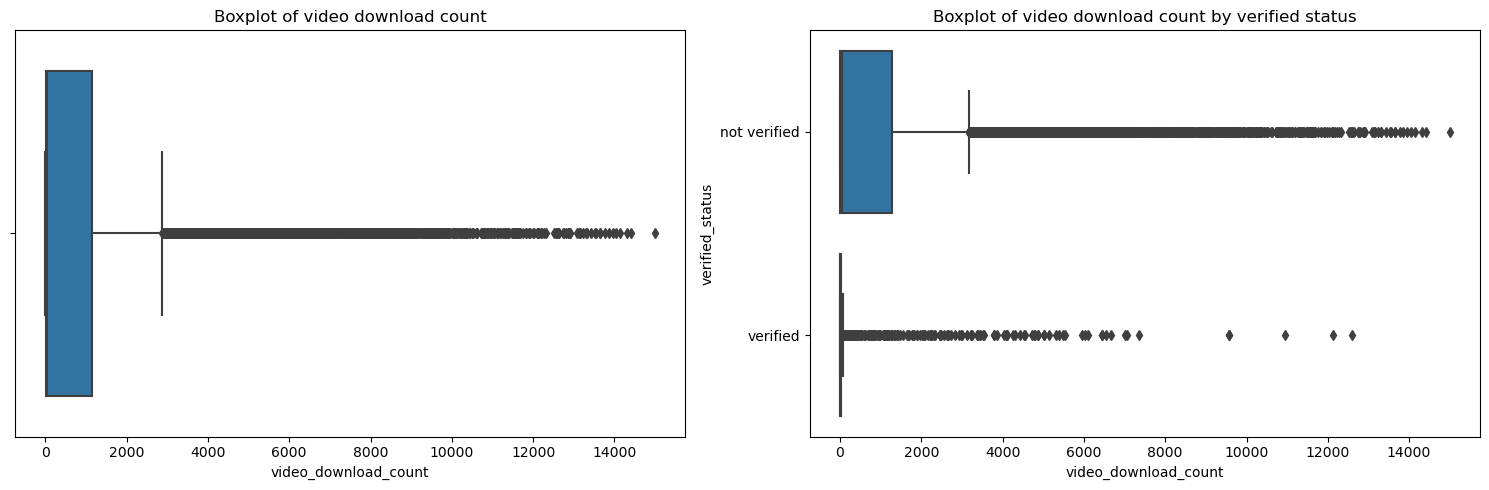

In [205]:
fig, (axes0, axes1) = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(data=data, x='video_download_count', showfliers=True, ax=axes0)
axes0.set_title('Boxplot of video download count')

sns.boxplot(data=data, x='video_download_count', y='verified_status', showfliers=True, ax=axes1)
axes1.set_title('Boxplot of video download count by verified status')

plt.tight_layout()
plt.show();

In [277]:
q25 = data['video_download_count'].quantile(0.25)
q75 = data['video_download_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = iqr * 1.5 + q75

data.loc[data['video_download_count'] > upper_limit, 'video_download_count'] = upper_limit

In [270]:
data['transcription_length'] = data['video_transcription_text'].apply(lambda text: len(text))

In [278]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
correlation_matrix_data = data.drop(['#', 'video_id'], axis=1).corr(numeric_only=True)

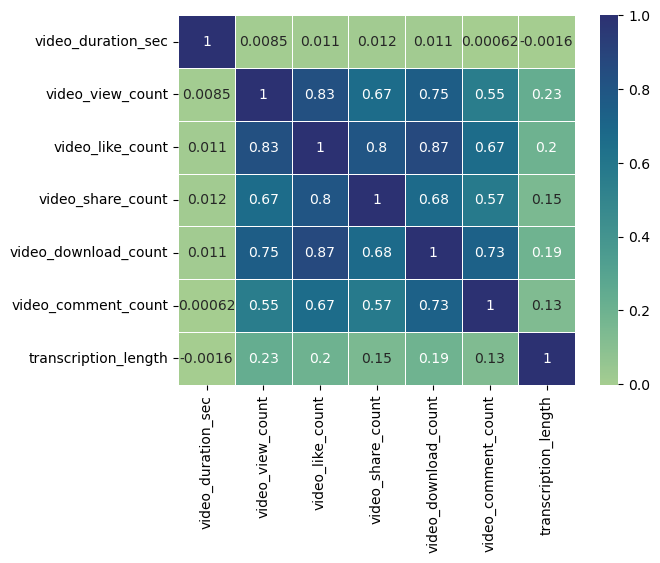

In [279]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
#plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix_data, cmap='crest', annot=True, linewidth=0.5);

In [280]:
indep_variables_data = data[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'transcription_length']]

In [281]:
vif_data = [variance_inflation_factor(indep_variables_data, i) for i in range(indep_variables_data.shape[1])]

In [282]:
vif_df_data = pd.DataFrame(vif_data, index=indep_variables_data.columns, columns=['VIF'])
vif_df_data

,VIF
video_duration_sec,4.143456
video_view_count,5.354307
video_like_count,11.243949
video_share_count,3.596741
video_download_count,7.131118
video_comment_count,2.607435
transcription_length,4.910919


Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [211]:
# Check class balance
### YOUR CODE HERE ###
data['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [212]:
data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [213]:
verified_percentage = data[data['verified_status'] == 'verified'].shape[0] / data.shape[0] * 100
print(f'The percentage of videos from a verified account in this data set is: {verified_percentage:.2f} %')

The percentage of videos from a verified account in this data set is: 6.29%


Use resampling to create class balance in the outcome variable, if needed.

In [214]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
verified_class = data[data['verified_status'] == 'verified']
not_verified_class = data[data['verified_status'] == 'not verified'] 

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
upsample_verified = resample(verified_class,
                             replace=True,
                             n_samples=len(not_verified_class),
                             random_state=0
                            )

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
upsampled_data = pd.concat([upsample_verified, not_verified_class]).reset_index(drop=True)

# Display new class counts
### YOUR CODE HERE ###
upsampled_data['verified_status'].value_counts()

verified_status
verified        17884
not verified    17884
Name: count, dtype: int64

In [215]:
upsampled_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,14015,opinion,5381182853,58,my friends' impression is that a candle’s flam...,verified,active,154.0,36.0,2.0,1.0,0.0
1,12805,opinion,2524108154,29,our impression is that the hummingbird is the ...,verified,active,9565.0,1505.0,593.0,14.0,2.0
2,15457,opinion,4462533276,25,my family's position is that neptune radiates ...,verified,active,9351.0,1850.0,62.0,14.0,2.0
3,14744,opinion,8794309928,24,my family's view is that the longest commercia...,verified,active,7361.0,527.0,207.0,1.0,0.0
4,17398,opinion,7566875258,17,i am willing to say that the best selling sing...,verified,active,1528.0,56.0,20.0,1.0,0.0


In [216]:
upsampled_data = upsampled_data.astype({'video_duration_sec' : float})
upsampled_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,14015,opinion,5381182853,58.0,my friends' impression is that a candle’s flam...,verified,active,154.0,36.0,2.0,1.0,0.0
1,12805,opinion,2524108154,29.0,our impression is that the hummingbird is the ...,verified,active,9565.0,1505.0,593.0,14.0,2.0
2,15457,opinion,4462533276,25.0,my family's position is that neptune radiates ...,verified,active,9351.0,1850.0,62.0,14.0,2.0
3,14744,opinion,8794309928,24.0,my family's view is that the longest commercia...,verified,active,7361.0,527.0,207.0,1.0,0.0
4,17398,opinion,7566875258,17.0,i am willing to say that the best selling sing...,verified,active,1528.0,56.0,20.0,1.0,0.0


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [217]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
mean_transcription = upsampled_data[['verified_status', 'video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg(lambda array: np.mean([len(text) for text in array]))
mean_transcription

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [218]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
upsampled_data['transcription_length'] = upsampled_data['video_transcription_text'].apply(lambda text: len(text))

In [219]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
upsampled_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,14015,opinion,5381182853,58.0,my friends' impression is that a candle’s flam...,verified,active,154.0,36.0,2.0,1.0,0.0,71
1,12805,opinion,2524108154,29.0,our impression is that the hummingbird is the ...,verified,active,9565.0,1505.0,593.0,14.0,2.0,78
2,15457,opinion,4462533276,25.0,my family's position is that neptune radiates ...,verified,active,9351.0,1850.0,62.0,14.0,2.0,81
3,14744,opinion,8794309928,24.0,my family's view is that the longest commercia...,verified,active,7361.0,527.0,207.0,1.0,0.0,86
4,17398,opinion,7566875258,17.0,i am willing to say that the best selling sing...,verified,active,1528.0,56.0,20.0,1.0,0.0,96


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

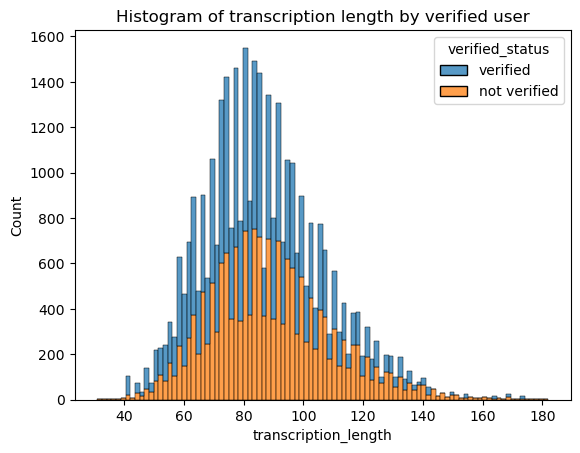

In [220]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=upsampled_data, x='transcription_length', hue='verified_status', multiple='stack')
plt.title('Histogram of transcription length by verified user');

<Axes: xlabel='transcription_length', ylabel='verified_status'>

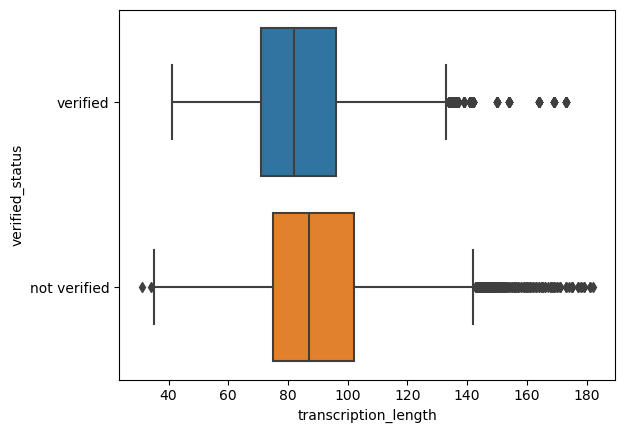

In [221]:
sns.boxplot(data=upsampled_data, x='transcription_length', y='verified_status')

<span style="color:red">**Observations:**</span> There isn't a significant difference in text length between verified status categories.

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [222]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
correlation_matrix = upsampled_data.drop(['#', 'video_id'], axis=1).corr(numeric_only=True)

Visualize a correlation heatmap of the data.

<Axes: >

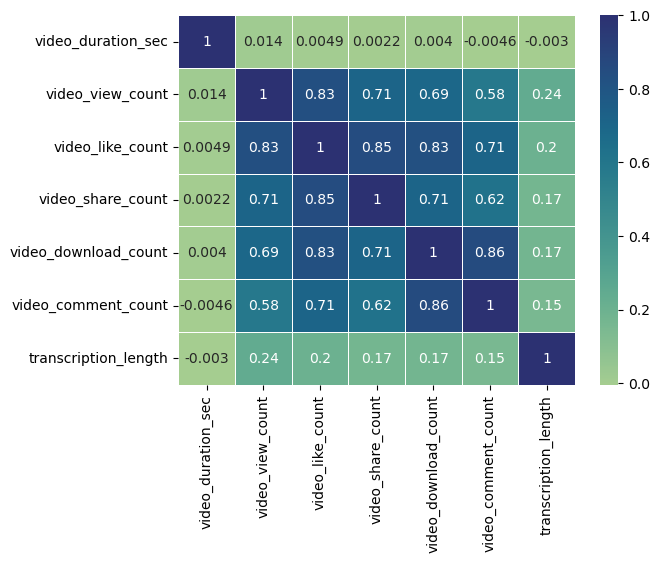

In [223]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
#plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix, cmap='crest', annot=True, linewidth=0.5)

In [224]:
indep_variables = upsampled_data[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'transcription_length']]

In [225]:
vif = [variance_inflation_factor(indep_variables, i) for i in range(indep_variables.shape[1])]

In [226]:
vif_df = pd.DataFrame(vif, index=indep_variables.columns, columns=['VIF'])
vif_df

,VIF
video_duration_sec,4.107559
video_view_count,4.560242
video_like_count,9.905158
video_share_count,4.288199
video_download_count,7.113795
video_comment_count,4.273385
transcription_length,4.620268


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

<span style="color:red">**Observations:**</span> All the numeric metrics, but length of a video’s transcription and video’s , are strongly correlated to each other. Specially number of comments and downloads (0.91); number of likes with number of views (0.86),  downloads (0.87) and shares (0.89); and downloads and shares (0.80) . That violates one of the assumptions for performing a logistic regression.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [227]:
# Select outcome variable
### YOUR CODE HERE ###
y = upsampled_data[['verified_status']]
y.head()

,verified_status
0,verified
1,verified
2,verified
3,verified
4,verified


In [228]:
y.shape

(35768, 1)

Select the features.

In [229]:
# Select features
### YOUR CODE HERE ###
X = upsampled_data[['claim_status', 'author_ban_status', 'video_comment_count', 'video_share_count', 'video_view_count', 'video_duration_sec']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,claim_status,author_ban_status,video_comment_count,video_share_count,video_view_count,video_duration_sec
0,opinion,active,0.0,2.0,154.0,58.0
1,opinion,active,2.0,593.0,9565.0,29.0
2,opinion,active,2.0,62.0,9351.0,25.0
3,opinion,active,0.0,207.0,7361.0,24.0
4,opinion,active,0.0,20.0,1528.0,17.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [230]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [231]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25037, 6), (10731, 6), (25037, 1), (10731, 1))

### **Task 3c. Encode variables**

Check the data types of the features.

In [232]:
# Check data types
### YOUR CODE HERE ###
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_status         35768 non-null  object 
 1   author_ban_status    35768 non-null  object 
 2   video_comment_count  35768 non-null  float64
 3   video_share_count    35768 non-null  float64
 4   video_view_count     35768 non-null  float64
 5   video_duration_sec   35768 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.6+ MB


In [233]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X['claim_status'].value_counts()

claim_status
opinion    23265
claim      12503
Name: count, dtype: int64

In [234]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X['author_ban_status'].value_counts()

author_ban_status
active          30344
under review     3191
banned           2233
Name: count, dtype: int64

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [235]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
X_onehot = pd.get_dummies(X, drop_first=True, dtype=float)

# Display first few rows
### YOUR CODE HERE ###
X_onehot

,video_comment_count,video_share_count,video_view_count,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,2.0,154.0,58.0,1.0,0.0,0.0
1,2.0,593.0,9565.0,29.0,1.0,0.0,0.0
2,2.0,62.0,9351.0,25.0,1.0,0.0,0.0
3,0.0,207.0,7361.0,24.0,1.0,0.0,0.0
4,0.0,20.0,1528.0,17.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
35763,2.0,81.0,6067.0,49.0,1.0,0.0,0.0
35764,0.0,70.0,2973.0,23.0,1.0,0.0,0.0
35765,1.0,7.0,734.0,50.0,1.0,0.0,0.0
35766,4.0,123.0,3394.0,8.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [236]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y.dtypes

verified_status    object
dtype: object

In [237]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y['verified_status'].unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [238]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_onehot = pd.get_dummies(y, drop_first=True, dtype=float)

In [239]:
y_onehot.head()

,verified_status_verified
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [240]:
y_onehot = y_onehot.iloc[:,0]
y_onehot

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
35763    0.0
35764    0.0
35765    0.0
35766    0.0
35767    0.0
Name: verified_status_verified, Length: 35768, dtype: float64

In [241]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###

# Display the encoded training outcome variable
### YOUR CODE HERE ###


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y_onehot, test_size=0.3, random_state=0)

In [243]:
X_train.head()

,video_comment_count,video_share_count,video_view_count,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
32925,0.0,64.0,2016.0,39.0,1.0,0.0,0.0
4266,5.0,351.0,2270.0,16.0,1.0,0.0,0.0
24979,183.0,38615.0,308728.0,17.0,0.0,0.0,0.0
24074,2216.0,36361.0,452382.0,52.0,0.0,0.0,0.0
32056,4.0,44.0,4116.0,20.0,1.0,0.0,0.0


In [244]:
y_train.head()

32925    0.0
4266     1.0
24979    0.0
24074    0.0
32056    0.0
Name: verified_status_verified, dtype: float64

In [245]:
y_train.value_counts()

verified_status_verified
1.0    12542
0.0    12495
Name: count, dtype: int64

In [246]:
y_train.shape

(25037,)

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [247]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
clf = LogisticRegression().fit(X_train, y_train)

In [248]:
clf.intercept_

array([0.00029009])

In [249]:
clf.coef_

array([[ 4.34251084e-05,  4.18470756e-06, -2.55043373e-06,
         8.44607290e-03,  3.76466416e-04, -1.34190906e-05,
        -2.09511208e-06]])

In [250]:
X_train_and_constant = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_and_constant)
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.619906
         Iterations 5


In [251]:
X_train_and_constant.shape, y_train.shape

((25037, 8), (25037,))

In [252]:
# Summary of the model
print(logit_result.summary())

# Extract coefficients and p-values
print("Coefficients:", logit_result.params)
print("P-values:", logit_result.pvalues)

                              Logit Regression Results                              
Dep. Variable:     verified_status_verified   No. Observations:                25037
Model:                                Logit   Df Residuals:                    25029
Method:                                 MLE   Df Model:                            7
Date:                      Tue, 19 Nov 2024   Pseudo R-squ.:                  0.1057
Time:                              16:42:44   Log-Likelihood:                -15521.
converged:                             True   LL-Null:                       -17354.
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9488      0.058    -16.339      0.000      -1.063      -0.835
video_comment_count    

In [253]:
# Predicted probabilities
X_test_and_constant = sm.add_constant(X_test)

predictions = logit_result.predict(X_test_and_constant)
print("Predicted probabilities:", predictions)

Predicted probabilities: 21061    0.269334
31748    0.657846
20197    0.237615
5727     0.647005
11607    0.622696
           ...   
14615    0.621788
11828    0.633869
17480    0.642939
22737    0.220407
22849    0.284300
Length: 10731, dtype: float64


In [254]:
y_test

21061    0.0
31748    0.0
20197    0.0
5727     1.0
11607    1.0
        ... 
14615    1.0
11828    1.0
17480    1.0
22737    0.0
22849    0.0
Name: verified_status_verified, Length: 10731, dtype: float64

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [255]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = clf.predict(X_test)

Display the predictions on the encoded testing set.

In [256]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([0., 1., 0., ..., 1., 0., 0.])

Display the true labels of the testing set.

In [257]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
clf.predict_proba(X_test)[::,-1]

array([0.47977796, 0.50750442, 0.19049922, ..., 0.55843218, 0.20014668,
       0.49889838])

Encode the true labels of the testing set so it can be compared to the predictions.

In [258]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
print(y_test.shape)

# Display the encoded testing outcome variable
y_test

(10731,)


21061    0.0
31748    0.0
20197    0.0
5727     1.0
11607    1.0
        ... 
14615    1.0
11828    1.0
17480    1.0
22737    0.0
22849    0.0
Name: verified_status_verified, Length: 10731, dtype: float64

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

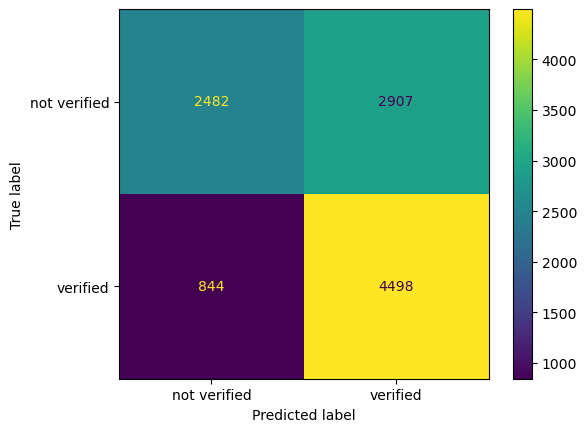

In [259]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred)
# Create display of confusion matrix
### YOUR CODE HERE ###
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not verified', 'verified']).plot();
# Plot confusion matrix
### YOUR CODE HERE ###
# Display plot
### YOUR CODE HERE ###

In [260]:
cm

array([[2482, 2907],
       [ 844, 4498]])

In [261]:
cm[1][1]

4498

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [262]:
print('Precision:', '%.2f' % (cm[1][1]/(cm[0][1]+cm[1][1])))

Precision: 0.61


In [263]:
print('%.2f' % (cm[0][0]/(cm[0][0]+cm[1][0])))

0.75


In [264]:
print('%.2f' % (cm[0][1]/(cm[0][0]+cm[0][1])))

0.54


In [265]:
# Create a classification report
### YOUR CODE HERE ###
metrics_report = classification_report(y_test, y_pred, target_names=['not verified', 'verified'])
print(metrics_report)

              precision    recall  f1-score   support

not verified       0.75      0.46      0.57      5389
    verified       0.61      0.84      0.71      5342

    accuracy                           0.65     10731
   macro avg       0.68      0.65      0.64     10731
weighted avg       0.68      0.65      0.64     10731



### **Task 4c. Interpret model coefficients**

In [266]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
model_coefficients = pd.DataFrame({'Feature name': clf.feature_names_in_, 'Log odd': clf.coef_.ravel()})
model_coefficients

,Feature name,Log odd
0,video_comment_count,0.000043
1,video_share_count,0.000004
2,video_view_count,-0.000003
3,video_duration_sec,0.008446
4,claim_status_opinion,0.000376
5,author_ban_status_banned,-0.000013
6,author_ban_status_under review,-0.000002


In [267]:
model_coefficients['Coefficient'] = model_coefficients['Log odd'].apply(lambda log_odd: np.exp(log_odd))

In [268]:
model_coefficients['Odd of verified (percentage)'] = model_coefficients['Coefficient'].apply(lambda coeff: '%.6f' % ((coeff - 1)*100))

In [269]:
model_coefficients

,Feature name,Log odd,Coefficient,Odd of verified (percentage)
0,video_comment_count,0.000043,1.000043,0.004343
1,video_share_count,0.000004,1.000004,0.000418
2,video_view_count,-0.000003,0.999997,-0.000255
3,video_duration_sec,0.008446,1.008482,0.848184
4,claim_status_opinion,0.000376,1.000377,0.037654
5,author_ban_status_banned,-0.000013,0.999987,-0.001342
6,author_ban_status_under review,-0.000002,0.999998,-0.000210


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?


<span style="color:red">**Observations:**</span>
- There are more false positives than true negatives. Specifically, 54 % of the actual negatives were wrongly identified.
- Although model’s Recall is 84 %, which means about 8 of 10 videos from verified users were correctly identified as coming from verified accounts, its Precision is just 61 %, that is, only around 6 of 10 videos identified as done by verified users were correctly predicted.
- Even worse, 56 % of all videos from not verified users were incorrectly predicted as coming from verified users, which affects model’s reliability.
- For each additional second of a video’s duration, the estimated odds of coming from a verified user increase in 0,85 %.


2. What results can be presented from this project?


<span style="color:red">**Observations:**</span>
- Remove number of comments in a video to see if that makes the logistic regression. 
- If possible, to use a model not as sensitive to collinearity as a logistic regression. 
- Create models for other variables that can also be used to analyse users, like author ban status.
- Length of video transcription’s text distribution is not different enough to be used as predictor of verified status. As an option, further research on identifying key words in those texts to identify, not only verified users, but also if they post claim or opinion videos.
- I consider this model should not be used yet until getting better results, specifically on detecting not verified users at a high percentage, since it could lead to fraudulent activities as impersonation.
- Further research and using other kind of models could be a possibility to improve results. Increasing the number of samples for verified users could help to have more data to train the chosen model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 